In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

import warnings

warnings.filterwarnings("ignore")

## business

In [5]:
business = pd.read_pickle("../../data/Yelp/business.pkl")
business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
business.isna().sum()

business_id          0
name                 0
address              0
city                 0
state                3
postal_code          0
latitude             0
longitude            0
stars                0
review_count         0
is_open              0
attributes       13744
categories         103
hours            23223
business_id     150341
name            150341
address         150341
city            150341
state           150341
postal_code     150341
latitude        150341
longitude       150341
stars           150341
review_count    150341
is_open         150341
attributes      150341
categories      150341
hours           150341
dtype: int64

todas las columnas están duplicadas, la copia con valores nulos. Dejamos unicamente las columnas con datos. 

In [7]:
# Creamos un diccionario con los nombres de columna como clave y una lista de columnas que tienen el mismo nombre como valor.
column_groups = {
    column: business.columns[business.columns.str.startswith(column, na=False)]
    for column in business.columns[~business.columns.duplicated()]
}

# Iteramos sobre el diccionario y reemplazamos los valores faltantes de las columnas con nombres idénticos.
for group_name, group_columns in column_groups.items():
    if len(group_columns) > 1:
        for column in group_columns[1:]:
            business[group_columns[0]] = business[group_columns[0]].fillna(
                business[column]
            )

# Mostramos los datos sin duplicados.
business = business.loc[:, ~business.columns.duplicated()]
business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


la información en la columna state no coincide con la informacion de columnas ciudad y latitud/longitud, es necesario corregir la información. El método será expuesto más adelante. 

In [8]:
business.dtypes

business_id     object
name            object
address         object
city            object
state           object
postal_code     object
latitude        object
longitude       object
stars           object
review_count    object
is_open         object
attributes      object
categories      object
hours           object
dtype: object

corrige columna 'state'

In [9]:
# Selecciona filas con letras en el codigo postal, ya que no se encuentran dento de EEUU
ZIP_with_letters = business[business["postal_code"].str.contains("[A-Za-z]")]

ZIP_with_letters

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
20,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,LA,T5J 1B9,53.546045,-113.499169,4.0,40,0,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."
46,JX4tUpd09YFchLBuI43lGw,Naked Cyber Cafe & Espresso Bar,10303 108 Street NW,Edmonton,PA,T5J 1L7,53.544682,-113.506589,4.0,12,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Arts & Entertainment, Music Venues, Internet S...","{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ..."
52,5BmQX4UVJY19mMtafMg7JA,Breadland Organic Whole Grain Bakery,"11642 104 Avenue, Unit 642",Edmonton,PA,T5K 2T7,53.547205,-113.522448,4.0,23,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Specialty Food, Bakeries, Food, Health Markets","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
53,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,10588 109 Street,Edmonton,FL,T5H 3B2,53.549633,-113.50878,5.0,20,0,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Coffee & Tea, Cafes, Pets, Restaurants, Pet Ad...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."
77,mFTaYsRDyeFaY2NDLfSaAA,River City Games,5203 99 Street NW,Edmonton,FL,T6E 5B7,53.489312,-113.485567,4.5,5,1,"{'BusinessParking': '{'garage': False, 'street...","Tabletop Games, Shopping, Sporting Goods","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150263,VRSQk67FPiDQolDyiaFnjg,Citytv,10212 Jasper Ave NW,Edmonton,PA,T5J 5A3,53.541168,-113.495953,4.0,8,1,None,"Television Stations, Mass Media",None
150276,Rn3DtOiuJtc3whFySWXs5Q,Japanese Village,2940 Calgary Trail NW,Edmonton,PA,T6J 7C2,53.463917,-113.494702,3.0,35,1,"{'RestaurantsAttire': 'u'casual'', 'NoiseLevel...","Japanese, Restaurants, Steakhouses, Sushi Bars","{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ..."
150332,t_SGoRT5yt14OWr64TOulA,Sherwood Park Kwik Lube,979 Fir St,Sherwood Park,PA,T8A 4N5,53.513215,-113.32868,5.0,5,1,None,"Oil Change Stations, Automotive, Auto Repair",None
150340,hn9Toz3s-Ei3uZPt7esExA,West Side Kebab House,2470 Guardian Road NW,Edmonton,NJ,T5T 1K8,53.509649,-113.675999,4.5,18,0,"{'Ambience': '{'touristy': False, 'hipster': F...","Middle Eastern, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


- 5556 registros están en fuera de EEUU, la mayoría de ellos en Canadá. Borrar

In [10]:
# Create a boolean series based on the condition that 'postal_code' is all digits
series = business["postal_code"].str.isdigit()

# Drop the rows with letters in the 'postal_code' column
business = business[series]

business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150339,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,PA,19014,39.856185,-75.427725,4.5,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


corrige columna state

In [11]:
us_state = gpd.read_file("../../data/Otras fuentes/cb_2018_us_state_500k.shp")
us_state.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [12]:
# 1. Convert latitude and longitude to Point objects
from shapely.geometry import Point

business["geometry"] = business.apply(
    lambda row: Point(row["longitude"], row["latitude"]), axis=1
)


# 2. Cast us_states geometry to a GeoDataFrame (if not already)
us_state = gpd.GeoDataFrame(us_state)


# 3. Function to check if point is within a state polygon
def is_within_state(point, state_geometry):
    return point.within(state_geometry)


# 4. Create a new column in business to store the state name
business["state_name"] = None

# 5. Loop through each point and assign corresponding state information
for index, row in business.iterrows():
    point = row["geometry"]
    for state_index, state_row in us_state.iterrows():
        state_geom = state_row["geometry"]
        if is_within_state(point, state_geom):
            business.at[index, "state_name"] = state_row["NAME"]
            business.at[index, "state_code"] = state_row["STUSPS"]  # Add new column
            break  # Stop checking after finding the state
# 6. Drop columns no longer needed

business = business.drop("state", axis=1)
business = business.drop("geometry", axis=1)
# Now, business has two new columns "state_name" and "state_code" with the corrected state information for each point
business.head()

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,state_name,state_code
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,California,CA
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",Missouri,MO
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",Arizona,AZ
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",Pennsylvania,PA
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",Pennsylvania,PA


In [13]:
business.isna().sum()

business_id         0
name                0
address             0
city                0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13129
categories        102
hours           22159
state_name         50
state_code         50
dtype: int64

identifica filas en state_name que no pudieron ser asignadas a un estado

In [14]:
# Select rows with null values in "state_corrected"
null_state_business = business[business["state_name"].isnull()]
null_state_business.head()

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,state_name,state_code
268,xloFoRiYlH4IKGz3FhTDpA,1-275 Rest Area Manatee County Mile 7,13018 Rest Area,Terra Ceia,34250,27.5843,-82.61395,4.0,5,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Hotels, Rest Stops, Event Planning & Services,...",None,None,NaN
4055,hk1KO4rAxGDgwlNSAO54yA,Ballast Point Park,5300 Interbay Blvd,Tampa,33611,27.889005,-82.481262,4.5,74,1,"{'GoodForKids': 'True', 'BusinessParking': '{'...","Active Life, Playgrounds, Parks, Fishing","{'Monday': '6:0-18:0', 'Tuesday': '6:0-18:0', ...",None,NaN
7880,mVMR2nvy96Jrl0Aqa8NeBg,Sabor del Caribe,7699 W Waters Ave,Tampa,33615,27.971704,-82.610598,4.5,8,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Puerto Rican, Food, Street Vendors, Food Truck...","{'Thursday': '11:30-17:0', 'Friday': '11:30-17...",None,NaN
8959,eL4lyE7LNoXEMvpcJ8WNVw,Deep Sea Tasting Room,217 G Stearns Wharf,Santa Barbara,93101,34.410007,-119.685549,4.0,472,1,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Bars, Venues & Event Spaces, Event Planning & ...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",None,NaN
9386,prBYQOdCXSjxV5DtBt37Kw,Wine and Canvas-Tampa,,Tampa Bay,33746,27.924912,-82.594307,4.0,5,1,{'GoodForKids': 'True'},"Paint & Sip, Arts & Entertainment",None,None,NaN


In [15]:
# elimina filas con valores nulos en state_name
business = business.dropna(subset=["state_name"])

cuenta la cantidad de sitios por estado

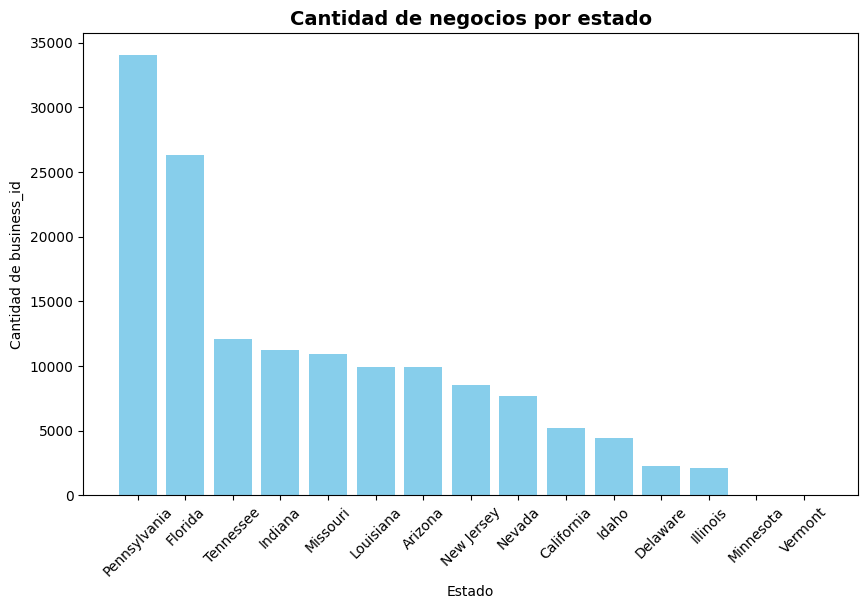

In [16]:
# Create a bar plot of the number of business_id by state_name in the column state_name
# using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(
    business["state_name"].value_counts().index,
    business["state_name"].value_counts(),
    color="skyblue",
)
plt.title("Cantidad de negocios por estado", fontsize=14, fontweight="bold")
plt.xlabel("Estado")
plt.ylabel("Cantidad de business_id")
plt.xticks(rotation=45)
plt.show()

explota información en columna category. Crea una fila por cada registro en la lista

In [17]:
def explode_categories(df):
    """Explodes the categories column into separate rows for each category."""
    # Split the string into a list using the split method
    df["categories"] = df["categories"].str.split(",")
    # Explode the list using the explode method
    return df.explode("categories").reset_index(drop=True)


exploded_df = explode_categories(business.copy())

exploded_df

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,state_name,state_code
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Doctors,None,California,CA
1,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Traditional Chinese Medicine,None,California,CA
2,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Naturopathic/Holistic,None,California,CA
3,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Acupuncture,None,California,CA
4,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Health & Medical,None,California,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645694,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...",Bikes,"{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",Illinois,IL
645695,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,33572,27.771002,-82.39491,4.5,9,1,"{'WheelchairAccessible': 'True', 'BusinessAcce...",Beauty & Spas,"{'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...",Florida,FL
645696,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,33572,27.771002,-82.39491,4.5,9,1,"{'WheelchairAccessible': 'True', 'BusinessAcce...",Permanent Makeup,"{'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...",Florida,FL
645697,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,33572,27.771002,-82.39491,4.5,9,1,"{'WheelchairAccessible': 'True', 'BusinessAcce...",Piercing,"{'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...",Florida,FL


In [18]:
# Create a boolean mask based on the condition that a value is null
mask = business.isna()

# Calculate the percentage of null values for each column
percent_null = mask.mean() * 100

# Display the percentage of null values for each column in a markdown table
print("| Column Name | Percentage of Null Values |")
print("| --- | --- |")
for col, pct in percent_null.items():
    print(f"| {col} | {pct:.2f}% |")

| Column Name | Percentage of Null Values |
| --- | --- |
| business_id | 0.00% |
| name | 0.00% |
| address | 0.00% |
| city | 0.00% |
| postal_code | 0.00% |
| latitude | 0.00% |
| longitude | 0.00% |
| stars | 0.00% |
| review_count | 0.00% |
| is_open | 0.00% |
| attributes | 9.07% |
| categories | 0.07% |
| hours | 15.30% |
| state_name | 0.00% |
| state_code | 0.00% |


In [19]:
def clean_data(exploded_df):
    # Filter rows based on column: 'categories'
    exploded_df = exploded_df[
        exploded_df["categories"].str.contains("onvenience", regex=False, na=False)
    ]
    return exploded_df


exploded_df_clean = clean_data(exploded_df.copy())
exploded_df_clean

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,state_name,state_code
234,0qNpTGTcqPwOLi2hADx4Xw,Charlie's Market,2815 E Sligh Ave,Tampa,33610,28.01036,-82.430042,3.0,9,1,"{'BusinessParking': '{'garage': False, 'street...",Convenience Stores,None,Florida,FL
349,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,19104,39.954573,-75.194894,3.0,56,1,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...",Convenience Stores,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Pennsylvania,PA
726,m9ncuZp0nEVhIwu24G-HRw,CVS Pharmacy,2215 Shelby St,Indianapolis,46203,39.7371,-86.1391,2.5,10,1,"{'BusinessParking': 'None', 'RestaurantsPriceR...",Convenience Stores,"{'Monday': '8:0-21:0', 'Tuesday': '10:0-20:0',...",Indiana,IN
777,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,2800 Opryland Dr,Nashville,37214,36.211592,-86.694319,3.0,1639,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",Convenience Stores,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Tennessee,TN
938,rCoWa-C7Os51GjFkCnFlVw,Rite Aid,700 Haddonfield Berlin Rd S37,Voorhees,08043,39.852159,-74.98264,4.5,6,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...",Convenience Stores,"{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",New Jersey,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645228,UKg1F0v-3q5V5SCyGWYj1g,Speedway,28232 Wesley Chapel Blvd,Wesley Chapel,33543,28.236004,-82.349088,2.5,7,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...",Convenience Stores,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Florida,FL
645472,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,89431,39.534947,-119.765698,4.0,5,1,{'BusinessAcceptsCreditCards': 'True'},Convenience Stores,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Nevada,NV
645489,Wko0HNelt55ZIp3Dm3eD2g,Swiss Farms Store,600 Baltimore Pike,Springfield,19064,39.920225,-75.325974,3.5,5,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",Convenience Stores,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",Pennsylvania,PA
645543,7xc84taj12pt-RtZhAfSkQ,Pimped Out Pickles,2801 N Kingshighway Blvd,Saint Louis,63115,38.660185,-90.225247,5.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...",Convenience Stores,"{'Tuesday': '12:0-18:0', 'Wednesday': '12:0-18...",Missouri,MO


In [54]:
exploded_df_clean.to_parquet(
    "../../01-data-cleaned/business_cs.parquet.gz", compression="gzip"
)

## review

In [22]:
review = pd.read_parquet("../../01-data-cleaned/review.parquet")
review

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [23]:
review.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [24]:
review.dtypes

review_id              object
user_id                object
business_id            object
stars                 float64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ms]
dtype: object

In [25]:
# comparo cantidad de id unicos en esta tabla vs en df business
review["business_id"].nunique()
# son casi identicos

150346

In [26]:
# Encuentra  la fecha más antigua y la más reciente
mas_antigua = review["date"].min()
mas_reciente = review["date"].max()

print(f"Reseña más antigua: {mas_antigua}")
print(f"Reseña más reciente: {mas_reciente}")

Reseña más antigua: 2005-02-16 03:23:22
Reseña más reciente: 2022-01-19 19:48:45


In [27]:
usuarios_unicos = review["user_id"].nunique()
print(f"Hay {usuarios_unicos} usuarios únicos")

Hay 1987929 usuarios únicos


In [28]:
df_new = review[review["business_id"].isin(exploded_df_clean["business_id"])]
df_new

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
32,40thYphUgIfvJq17QCfTwA,QzCEzH3R7Z6erOGLr3t55Q,0pMj5xUAecW9o1P35B0AMw,5.0,1,0,1,Great staff always helps and always nice. Alwa...,2017-05-26 13:10:24
200,HSjRz31mvRBQRo8deXrr_w,K-3kF5Wc3b8cOHTAJpV9tA,ORL4JE6tz3rJxVqkdKfegA,2.0,0,0,0,"Too big, too expensive and too far from Downto...",2013-08-03 16:26:48
278,-Lkjo_vV2DEemMpMBlbeHA,g9fWvUzGBsKtovXrHM02uA,_ReMedGR8eDM5AgdRK0jCw,4.0,3,0,2,"This is a convenience store deli, so don't exp...",2015-05-26 14:45:13
341,2fD2Do7xBjoahST3FmiwcQ,avQwKRvXc21koLCbahFEig,AY1SyySRyTnBwBdf7qfGxQ,5.0,3,0,2,"From the second you walk in the door, you're g...",2009-08-04 18:04:15
489,WqsuFJU7wqu5nSOGDdh-tQ,mGUYWSFpmVvDQTLDvkzk4w,Ir4-CFGZDfloJkUMax13Og,3.0,1,0,0,"They have a couple of really nice ladies, that...",2013-05-08 13:48:00
...,...,...,...,...,...,...,...,...,...
6989769,6Ov3tR0qoAe-66POwD6-uw,pOLqrWCflFJUwXNCOX_sow,FaY_9x8ZtsuHe5wS2iJM1Q,3.0,0,0,1,"Very hole in the wall spot, no-nonsense servic...",2021-07-24 22:52:25
6989794,_GLxcZNOYgTWzVPozmjDUQ,32hMcxaohQrPBbNi5HRIeg,pbP-0fvl7zwRHoI6qzgL6w,5.0,1,1,1,This Rite Aid has the friendliest staff ever! ...,2017-05-11 23:54:33
6989865,dzbFc_eZ-HXFzgn8BFmb4A,ORayZ85NtifE3oWG0o5MCg,je8HwCtpyIRQOa-QCNBf7w,5.0,0,0,0,"Very good customer service. They try hard, an...",2013-06-15 23:19:00
6989957,5BUtrBgmtveGaycBriKNUw,r9S0VYrdXJrdhfR7OXj8tA,TP3dM7jh5_pTp1DKci_eSQ,4.0,14,5,12,One of my favorite Wawa locations. \n\nConveni...,2020-01-01 19:53:01


In [51]:
df_new.to_parquet("../../01-data-cleaned/review_cs.parquet.gz", compression="gzip")

## check in 

In [30]:
checkin = pd.read_json("../../data/Yelp/checkin.json", lines=True)


checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


## user

In [37]:
user = pd.read_parquet("../../data/Yelp/data_parquet/user.parquet")


user

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,Jennilee,38,2012-01-19 23:33:02,74,9,6,,kmwNG5LZSHFmveg6wYYdrw,0,...,1,0,0,0,1,4,0,0,1,0
2105593,tmelBbVBGAzXBVfH2u_R6g,Gerry,19,2009-06-09 16:34:54,14,5,2,,"BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...",1,...,1,0,0,0,0,1,0,0,0,0
2105594,tpBznnD6uJN3m_pJubj09w,Emily,26,2013-08-13 23:18:11,4,1,2,,"bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...",0,...,0,0,0,0,1,0,0,0,0,0
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,25,2015-01-10 00:06:25,21,2,5,,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...",0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
user.dtypes

user_id                object
name                   object
review_count            int64
yelping_since          object
useful                  int64
funny                   int64
cool                    int64
elite                  object
friends                object
fans                    int64
average_stars         float64
compliment_hot          int64
compliment_more         int64
compliment_profile      int64
compliment_cute         int64
compliment_list         int64
compliment_note         int64
compliment_plain        int64
compliment_cool         int64
compliment_funny        int64
compliment_writer       int64
compliment_photos       int64
dtype: object

In [39]:
usuarios_unicos = user["user_id"].nunique()
print(f"Hay {usuarios_unicos} usuarios únicos")

Hay 1987897 usuarios únicos


In [40]:
# convierte columna a formato datetime
user["yelping_since"] = pd.to_datetime(user["yelping_since"])

# encuentra el usuario más antiguo
earliest_user = user.loc[user["yelping_since"].idxmin()]
print(
    "El usuario más antiguo es:",
    {earliest_user["user_id"]},
    "desde",
    {earliest_user["yelping_since"]},
)

El usuario más antiguo es: {'fFGPBtsutYpn3A155Sf75Q'} desde {Timestamp('2004-10-12 08:46:11')}


In [42]:
df_user = user[user["user_id"].isin(df_new["user_id"])]
df_user

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
23,MGPQVLsODMm9ZtYQW-g_OA,Jelena,1807,2008-01-19 22:50:00,17331,10461,13734,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","HpJzEFN1kyuH6VAF_usqKg, F_NG8ZaNVriV_hujoOejIA...",828,...,167,206,395,130,915,3396,1915,1915,696,470
32,NIhcRW6DWvk1JQhDhXwgOQ,Lia,2288,2005-12-30 13:47:19,12773,4199,7971,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...",345,...,63,46,47,21,518,773,867,867,310,231
36,rppTTi-kfF8-qyiArNemag,Helen,460,2006-01-24 14:33:32,700,149,425,"2010,2012,2013,2014,2015,2016,2017,2018","HzoQKKHDq9BI37dyJAAtGA, Inh7WS8hpmiUmNDhtLK-ZQ...",49,...,11,2,2,0,16,23,43,43,20,25
50,IpLRJY4CP3fXtlEd8Y4GFQ,Robyn,518,2009-04-11 14:35:46,1325,450,348,"2009,2010,2011","hdwDo7CLh9aN_9PckAos4Q, ci-mepWGgsgGT3sFI2mhMg...",35,...,4,2,7,1,35,17,20,20,20,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105483,85_uGvqVkwbjVY8YIMOlug,KC,16,2013-08-02 23:30:04,8,1,2,,2M-XDwADz9Bhwhd_RNAHqg,0,...,0,0,0,0,0,0,0,0,0,0
2105542,IBO22g3UAEAOZm-10KZDtg,Izzy,100,2013-10-10 02:53:57,108,47,30,,"yT-_eBBTWf-iR8LflMZjAg, LR5KLo9TkFbuLTUnQXz0xA...",2,...,0,0,0,0,2,4,1,1,0,0
2105566,O6e_dHvcb_UnsjmCXcQu_w,Melanie,29,2007-05-08 15:50:15,56,2,26,,"cSGDhxbg-zMO376-tvDgHw, 28HzJxxy91efxfh_qM2osQ...",3,...,3,0,0,0,4,2,1,1,0,0
2105584,RPyGU7Q0Sqklh-9B3eTd-w,James,51,2015-04-09 22:30:23,42,8,16,,"08VmvYRYOoIZvXNTxxGdzg, q8pAYhK0Mpar_Vb_1R_tkg...",1,...,0,0,0,0,2,3,0,0,1,0


In [52]:
df_user.to_parquet("../../01-data-cleaned/user_cs.parquet.gz", compression="gzip")

## tip

In [44]:
tip = pd.read_json("../../data/Yelp/tip.json", lines=True)
tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [45]:
tip.isna().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [46]:
# Encuentra  la fecha más antigua y la más reciente
mas_antigua = tip["date"].min()
mas_reciente = tip["date"].max()

print(f"Tip más antiguo: {mas_antigua}")
print(f"Tip más reciente: {mas_reciente}")

Tip más antiguo: 2009-04-16 13:11:49
Tip más reciente: 2022-01-19 20:38:55


In [47]:
df_tip = tip[tip["business_id"].isin(exploded_df_clean["business_id"])]
df_tip

,user_id,business_id,text,date,compliment_count
39,9C_h-H1Z7Xz7dvbgsBrnSg,wuoYvojFNWuRrUO2UyM47Q,Slowest gas attendants ever,2011-08-07 23:43:48,0
198,SKJpOreXKa1PRpvSKjzMng,kM9akuLxeDDLDqAzYIBWMg,Check out at the pharmacy if the regular line ...,2014-06-10 02:30:51,0
548,DadXMJ2QiW5gGrXz49w_ag,ftCK0qmDE3yj8TT0RQh5rA,Good people working here.,2015-01-18 03:34:33,0
560,Ye-9S8f2dt41UBfy4lXffA,JwDz-h8-R8lXvgpFQTz3vw,Perfect place to get water & other sundry item...,2011-07-17 17:27:03,0
714,t3GdQhAtOP3GYI7JF_49vg,eOdJgsNyROi8TDV-F-_juA,Delicious hoagies!,2011-12-24 19:00:39,0
...,...,...,...,...,...
907274,cKI9nXfUkN-2-RY8A5Q26w,Cb2EBdElxGV2xXY4zr-3mQ,Very clean place!,2015-03-18 16:36:43,0
907823,HS5l-Xi1TNe1EL3dt6erRQ,6ujYoGpCBh8A-PJyzZvzNg,Excellent falafel and hummus. Shawarma's on po...,2020-08-02 21:12:12,0
907960,QvsrR76iIcyvvq_yjGiaDg,YpDaWXu6IuCNEBYB-hoPDw,Cant believe how bad the service is here calle...,2017-04-16 17:10:40,0
908500,oqejK2aLfidEBa5VdF1OqQ,ykLukxAf8_iaDJwVUyYHlA,tall redhead who works there has a great ass,2014-04-28 00:08:22,0


In [53]:
df_tip.to_parquet("../../01-data-cleaned/tip_cs.parquet.gz", compression="gzip")